# Лабораторная работа 2
Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.


Цель лабораторной работы: изучение способов предварительной обработки данных для дальнейшего формирования моделей.


Задание:
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
обработку пропусков в данных;
кодирование категориальных признаков;
масштабирование данных.

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [100]:
data = pd.read_csv('./googleplaystore.csv', sep=",")

In [101]:
# размер набора данных
data.shape

(10841, 13)

In [102]:
# типы колонок
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [103]:
# проверим есть ли пропущенные значения
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [104]:
# Первые 5 строк датасета
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [105]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 10841


## Обработка пропусков в данных

### Простые стратегии - удаление или заполнение нулями

In [106]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((10841, 13), (10841, 8))

In [107]:
data_new_1.head()

,App,Category,Reviews,Size,Installs,Price,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",0,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",0,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",0,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",0,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",0,Art & Design;Creativity,"June 20, 2018"


In [108]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((10841, 13), (9360, 13))

In [109]:
data_new_2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## "Внедрение значений" - импьютация (imputation)

In [110]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Rating. Тип данных float64. Количество пустых значений 1474, 13.6%.


In [111]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
10836,4.5
10837,5.0
10838,NaN
10839,4.5


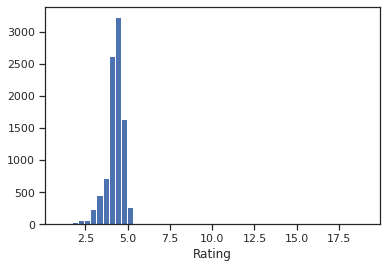

In [112]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [113]:
data_num_inspection_scores = data_num[['Rating']]
data_num_inspection_scores.head()

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3


In [114]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [115]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_inspection_scores)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [116]:
strategies=['mean', 'median', 'most_frequent']

In [117]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_inspection_scores)
    return data_num_imp[mask_missing_values_only]

In [118]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([4.19333832, 4.19333832, 4.19333832, ..., 4.19333832, 4.19333832,
        4.19333832]))

In [119]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [120]:
data[['Rating']].describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [121]:
test_num_impute_col(data, 'Rating', strategies[0])

('Rating', 'mean', 1474, 4.193338315362443, 4.193338315362443)

### Обработка пропусков в категориальных данных

In [122]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Type. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Content Rating. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Current Ver. Тип данных object. Количество пустых значений 8, 0.07%.
Колонка Android Ver. Тип данных object. Количество пустых значений 3, 0.03%.


In [123]:
cat_temp_data = data[['Android Ver']]
cat_temp_data.head()

,Android Ver
0,4.0.3 and up
1,4.0.3 and up
2,4.0.3 and up
3,4.2 and up
4,4.4 and up


In [124]:
cat_temp_data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [125]:
cat_temp_data[cat_temp_data['Android Ver'].isnull()].shape

(3, 1)

In [126]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['4.0.3 and up'],
       ['4.0.3 and up'],
       ['4.0.3 and up'],
       ...,
       ['2.2 and up'],
       ['Varies with device'],
       ['Varies with device']], dtype=object)

In [127]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['1.0 and up', '1.5 and up', '1.6 and up', '2.0 and up',
       '2.0.1 and up', '2.1 and up', '2.2 - 7.1.1', '2.2 and up',
       '2.3 and up', '2.3.3 and up', '3.0 and up', '3.1 and up',
       '3.2 and up', '4.0 and up', '4.0.3 - 7.1.1', '4.0.3 and up',
       '4.1 - 7.1.1', '4.1 and up', '4.2 and up', '4.3 and up',
       '4.4 and up', '4.4W and up', '5.0 - 6.0', '5.0 - 7.1.1',
       '5.0 - 8.0', '5.0 and up', '5.1 and up', '6.0 and up',
       '7.0 - 7.1.1', '7.0 and up', '7.1 and up', '8.0 and up',
       'Varies with device'], dtype=object)

In [128]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='4.2 and up')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['4.0.3 and up'],
       ['4.0.3 and up'],
       ['4.0.3 and up'],
       ...,
       ['2.2 and up'],
       ['Varies with device'],
       ['Varies with device']], dtype=object)

In [129]:
np.unique(data_imp3)

array(['1.0 and up', '1.5 and up', '1.6 and up', '2.0 and up',
       '2.0.1 and up', '2.1 and up', '2.2 - 7.1.1', '2.2 and up',
       '2.3 and up', '2.3.3 and up', '3.0 and up', '3.1 and up',
       '3.2 and up', '4.0 and up', '4.0.3 - 7.1.1', '4.0.3 and up',
       '4.1 - 7.1.1', '4.1 and up', '4.2 and up', '4.3 and up',
       '4.4 and up', '4.4W and up', '5.0 - 6.0', '5.0 - 7.1.1',
       '5.0 - 8.0', '5.0 and up', '5.1 and up', '6.0 and up',
       '7.0 - 7.1.1', '7.0 and up', '7.1 and up', '8.0 and up',
       'Varies with device'], dtype=object)

In [130]:
data_imp3[data_imp3=='4.2 and up'].size

397

## Преобразование категориальных признаков в числовые

In [131]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,4.0.3 and up
1,4.0.3 and up
2,4.0.3 and up
3,4.2 and up
4,4.4 and up
...,...
10836,4.1 and up
10837,4.1 and up
10838,2.2 and up
10839,Varies with device


### Кодирование категорий целочисленными значениями (label encoding)


#### Использование LabelEncoder

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
cat_enc['c1'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [134]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [135]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['1.0 and up', '1.5 and up', '1.6 and up', '2.0 and up',
       '2.0.1 and up', '2.1 and up', '2.2 - 7.1.1', '2.2 and up',
       '2.3 and up', '2.3.3 and up', '3.0 and up', '3.1 and up',
       '3.2 and up', '4.0 and up', '4.0.3 - 7.1.1', '4.0.3 and up',
       '4.1 - 7.1.1', '4.1 and up', '4.2 and up', '4.3 and up',
       '4.4 and up', '4.4W and up', '5.0 - 6.0', '5.0 - 7.1.1',
       '5.0 - 8.0', '5.0 and up', '5.1 and up', '6.0 and up',
       '7.0 - 7.1.1', '7.0 and up', '7.1 and up', '8.0 and up',
       'Varies with device'], dtype=object)

In [136]:
cat_enc_le

array([15, 15, 15, ...,  7, 32, 32])

In [137]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

#### Кодирование категорий наборами бинарных значений

In [138]:
from sklearn.preprocessing import OneHotEncoder

In [139]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [140]:
cat_enc.shape

(10841, 1)

In [141]:
cat_enc_ohe.shape

(10841, 33)

In [142]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0.,

In [143]:
cat_enc.head(10)

,c1
0,4.0.3 and up
1,4.0.3 and up
2,4.0.3 and up
3,4.2 and up
4,4.4 and up
5,2.3 and up
6,4.0.3 and up
7,4.2 and up
8,3.0 and up
9,4.0.3 and up


In [144]:
pd.get_dummies(cat_enc).head()

,c1_1.0 and up,c1_1.5 and up,c1_1.6 and up,c1_2.0 and up,c1_2.0.1 and up,c1_2.1 and up,c1_2.2 - 7.1.1,c1_2.2 and up,c1_2.3 and up,c1_2.3.3 and up,...,c1_5.0 - 7.1.1,c1_5.0 - 8.0,c1_5.0 and up,c1_5.1 and up,c1_6.0 and up,c1_7.0 - 7.1.1,c1_7.0 and up,c1_7.1 and up,c1_8.0 and up,c1_Varies with device
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Android Ver_1.0 and up,Android Ver_1.5 and up,Android Ver_1.6 and up,Android Ver_2.0 and up,Android Ver_2.0.1 and up,Android Ver_2.1 and up,Android Ver_2.2 - 7.1.1,Android Ver_2.2 and up,Android Ver_2.3 and up,Android Ver_2.3.3 and up,...,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device,Android Ver_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Масштабирование данных

In [146]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [147]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Rating']])

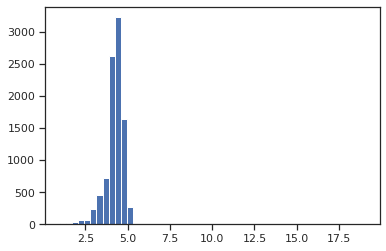

In [148]:
plt.hist(data['Rating'], 50)
plt.show()

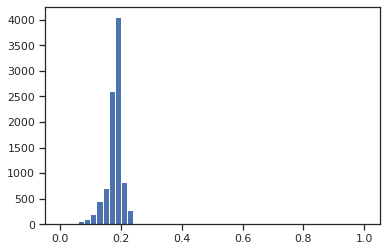

In [149]:
plt.hist(sc1_data, 50)
plt.show()